In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)

In [4]:
df=pd.read_csv("household_power_consumption_clean.csv",
                  parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 )

**taking 20k data out of total . based on year**

In [5]:
file_count = 4000
samples = []
for category in df['year'].unique():    
    category_slice = df.query("year == @category")    
    samples.append(category_slice.sample(file_count, replace=False,random_state=1))
df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
print ( df['year'].value_counts())
print (len(df))

2008    4000
2010    4000
2006    4000
2009    4000
2007    4000
Name: year, dtype: int64
20000


- Show Top 5 Records

In [6]:
df.head()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day
0,2008-02-19 23:27:00,0.236,0.000,246.46,1.0,0.0,0.0,0.0,2008,2,19
1,2010-07-28 14:21:00,0.956,0.290,236.54,4.2,0.0,0.0,12.0,2010,7,28
2,2006-12-29 07:36:00,3.970,0.322,236.90,16.8,0.0,1.0,18.0,2006,12,29
3,2010-11-12 00:32:00,1.324,0.072,243.13,5.4,0.0,0.0,18.0,2010,11,12
4,2006-12-26 14:53:00,2.650,0.292,245.58,10.8,0.0,4.0,18.0,2006,12,26


- Shape of the dataset

In [7]:
df.shape

(20000, 11)

- Summary of the dataset

In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day
count,19787.000000,19787.000000,19787.000000,19787.000000,19787.000000,19787.000000,19787.000000,20000.000000,20000.000000,20000.000000
mean,1.244866,0.125579,240.943269,5.273321,1.175974,1.467175,6.646030,2008.000000,7.540150,17.450500
std,1.184086,0.115272,3.375317,4.978624,6.311473,6.442616,8.477299,1.414249,3.743313,8.697496
min,0.078000,0.000000,226.120000,0.200000,0.000000,0.000000,0.000000,2006.000000,1.000000,1.000000
25%,0.320000,0.048000,238.960000,1.400000,0.000000,0.000000,0.000000,2007.000000,4.000000,10.000000
50%,0.848000,0.102000,241.110000,3.600000,0.000000,0.000000,1.000000,2008.000000,8.000000,18.000000
75%,1.731000,0.194000,243.080000,7.200000,0.000000,1.000000,17.000000,2009.000000,12.000000,25.000000
max,9.686000,1.082000,253.530000,42.000000,78.000000,76.000000,31.000000,2010.000000,12.000000,31.000000


**report**
- Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2  have very high difference between the 75% and max

**Information**

**dataset - https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption**

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

**Check Datatypes in the dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dt                     20000 non-null  datetime64[ns]
 1   Global_active_power    19787 non-null  float64       
 2   Global_reactive_power  19787 non-null  float64       
 3   Voltage                19787 non-null  float64       
 4   Global_intensity       19787 non-null  float64       
 5   Sub_metering_1         19787 non-null  float64       
 6   Sub_metering_2         19787 non-null  float64       
 7   Sub_metering_3         19787 non-null  float64       
 8   year                   20000 non-null  int64         
 9   month                  20000 non-null  int64         
 10  day                    20000 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 1.7 MB


In [10]:
# all the features are in float except dateTime

### ***EXPLORING DATA***

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype == 'float64' or df[feature].dtype == 'int64']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

We have 10 numerical features : ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'year', 'month', 'day']


## Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

- Numerical Features 

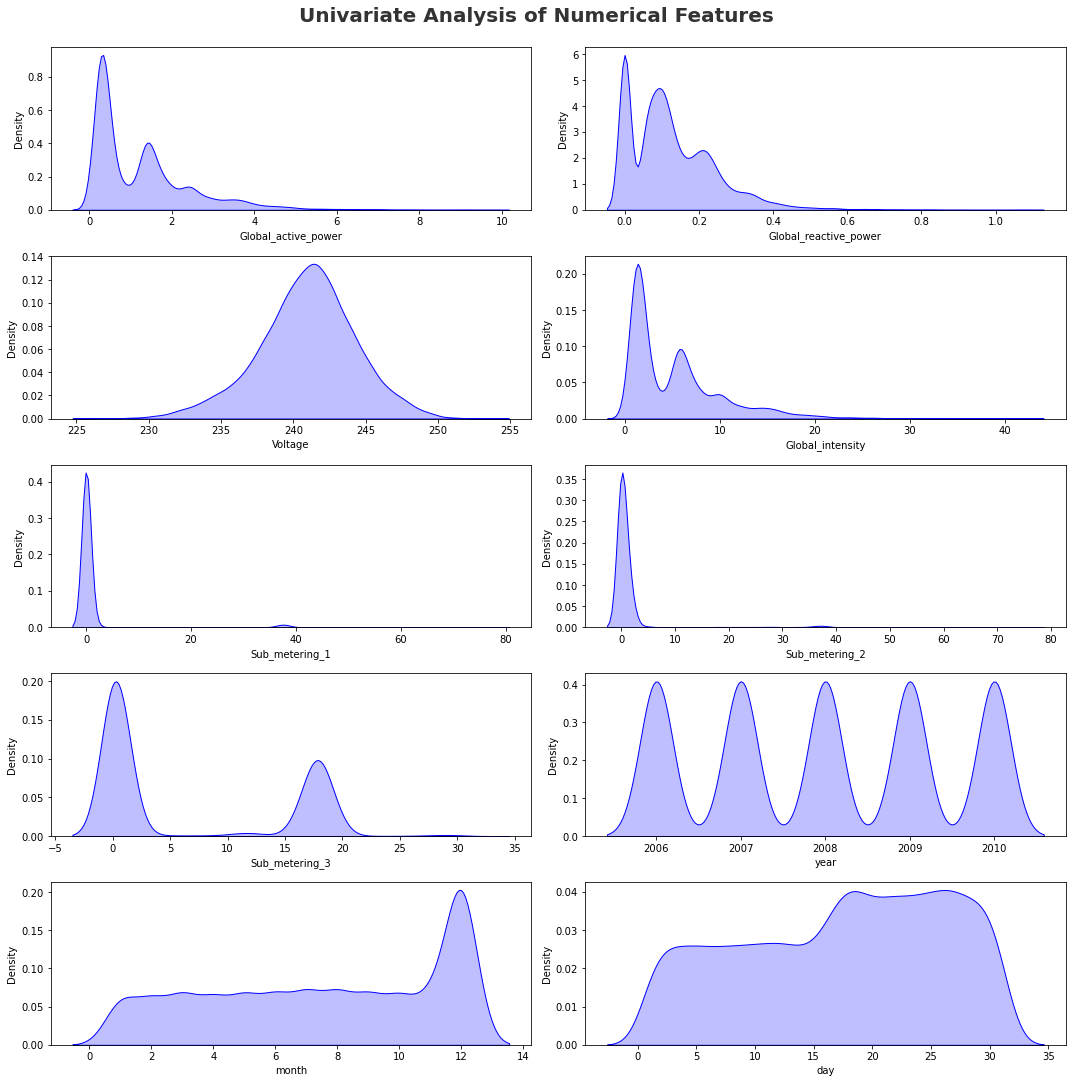

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

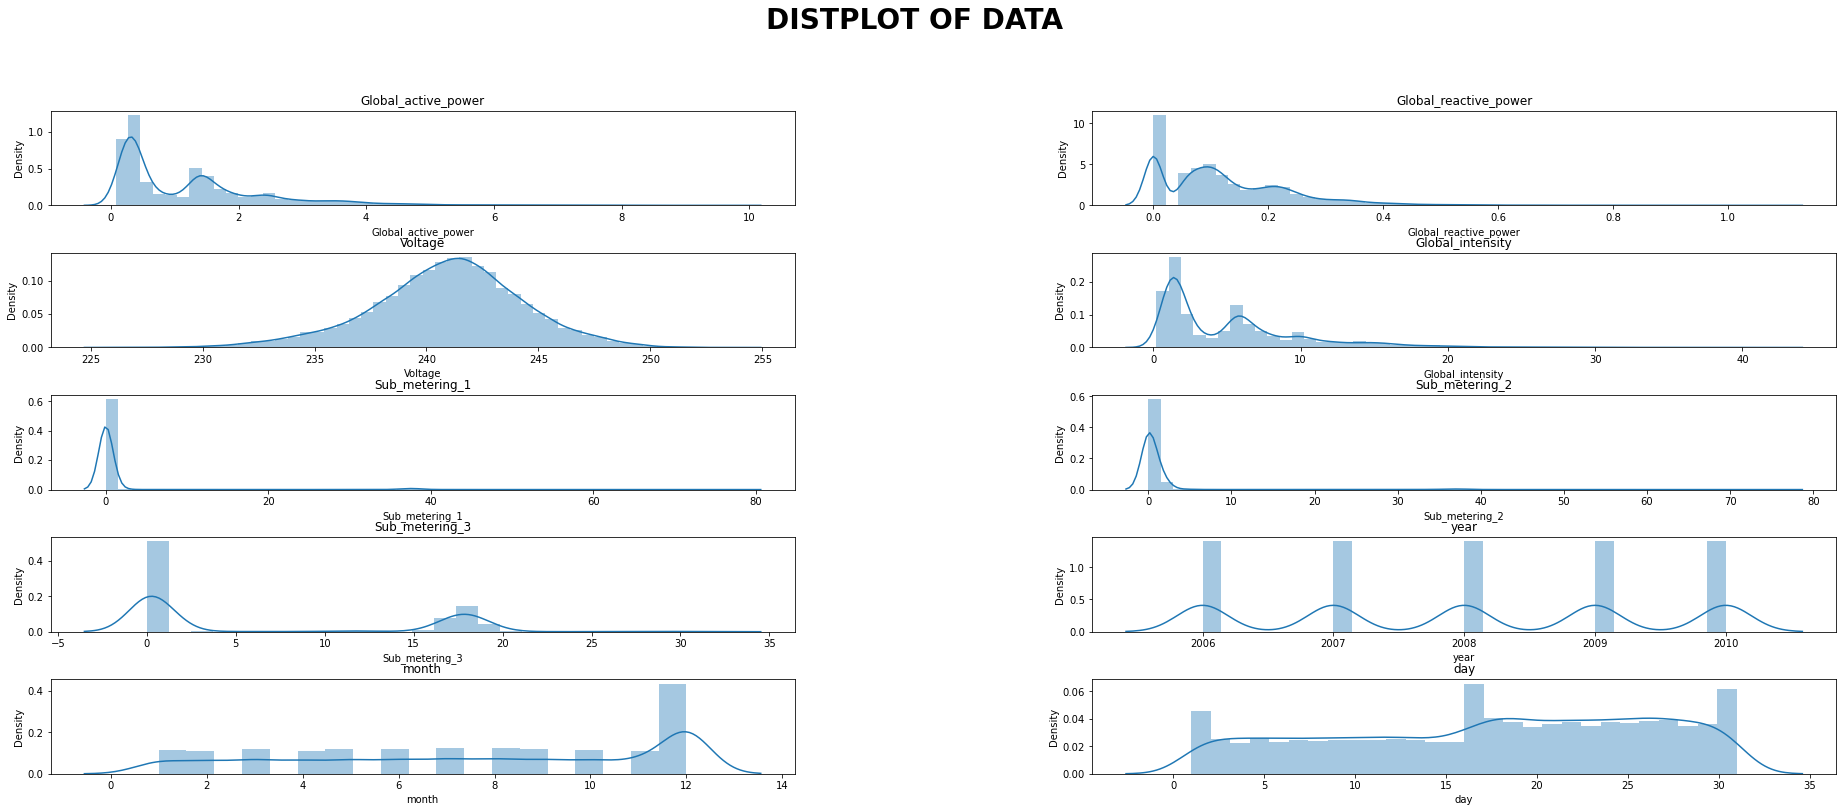

In [13]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_features):  
    ax1 = fig.add_subplot(10,2, i+1);
    ax1 = sns.distplot(df[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

**report**


- Global_active_power , Global_reactive_power ,Global_intensity have rigt skewed data (possibility of outliers)
- sub_metering_3 have two trough
- distribution of the distribution is similar to normal distribution
- In 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' the values are staring from 0


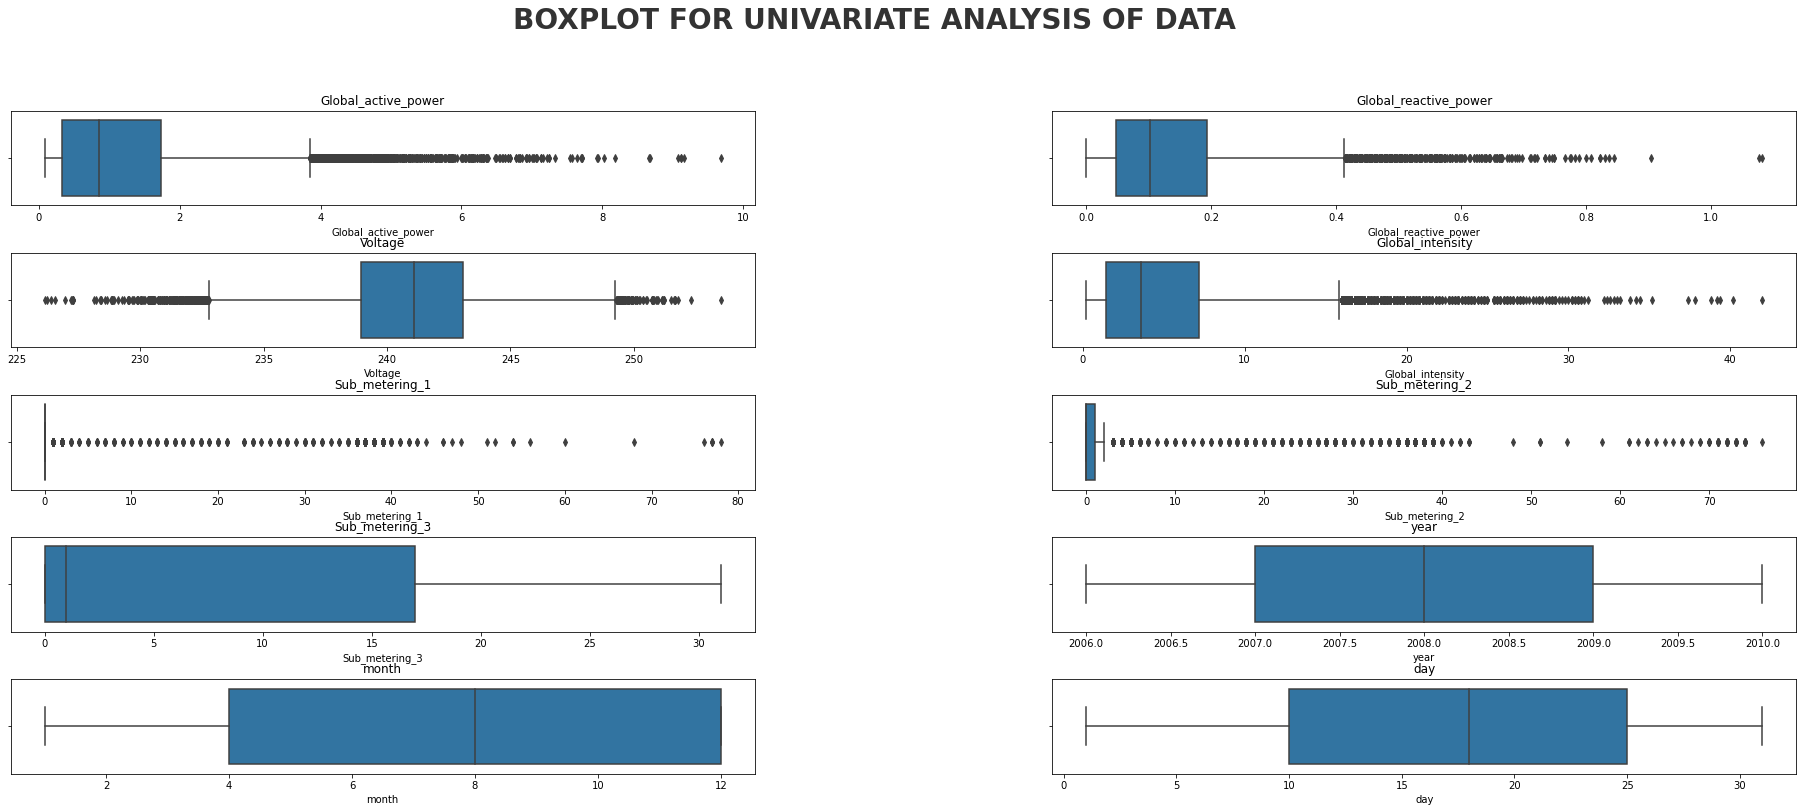

In [14]:
features =numeric_features
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(10,2, i+1);
    ax1 = sns.boxplot(data = df, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

**report**
- mostly all numerical the features have outliers except Sub_metering_3 .. 

# Handling outlers

In [15]:
df1=df.copy() # creating a copy of the data

In [16]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [17]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

In [18]:
# using iqr method for the features which are right skewed  --> Global_active_power, Global_reactive_power, Global_intensity,Sub_metering_1, Sub_metering_2

**for fixed Global_active_power**

In [19]:
remove_outliers_IQR('Global_active_power')

percentile25 0.32
percentile75 1.7309999999999999
Upper limit 3.8474999999999997
Lower limit -1.7964999999999998


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day


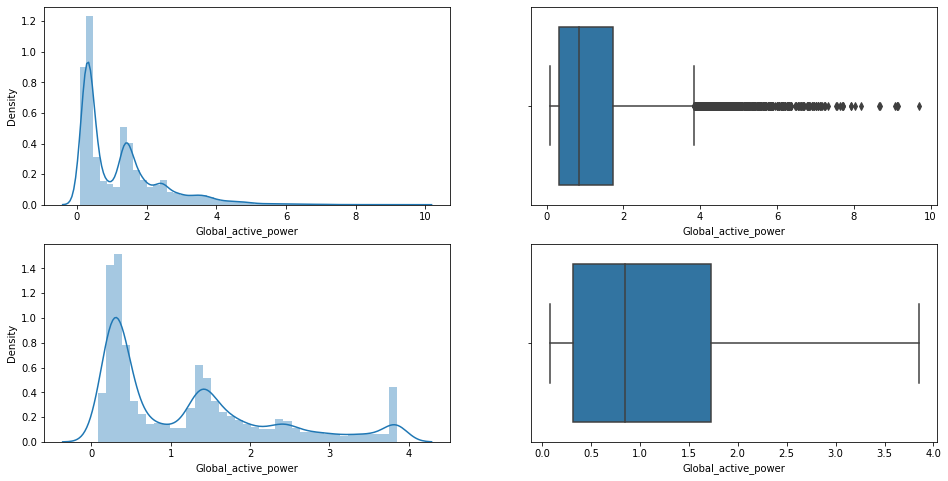

In [20]:
create_comparison_plot(df,df1,"Global_active_power")

**for fixed Global_reactive_power**

In [21]:
remove_outliers_IQR('Global_reactive_power')

percentile25 0.048
percentile75 0.194
Upper limit 0.41300000000000003
Lower limit -0.17100000000000004


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day


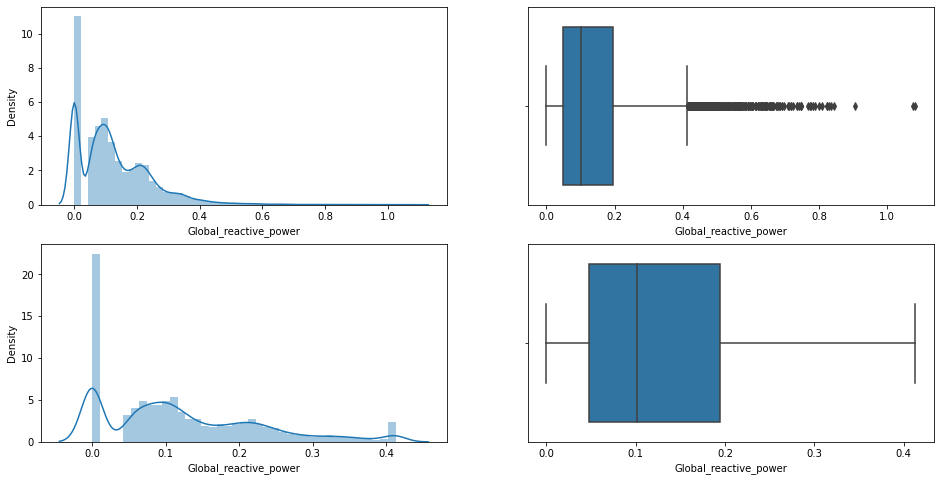

In [22]:
create_comparison_plot(df,df1,"Global_reactive_power")

**for fixed Global_intensity**

In [23]:
remove_outliers_IQR('Global_intensity')

percentile25 1.4
percentile75 7.2
Upper limit 15.900000000000002
Lower limit -7.300000000000001


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day


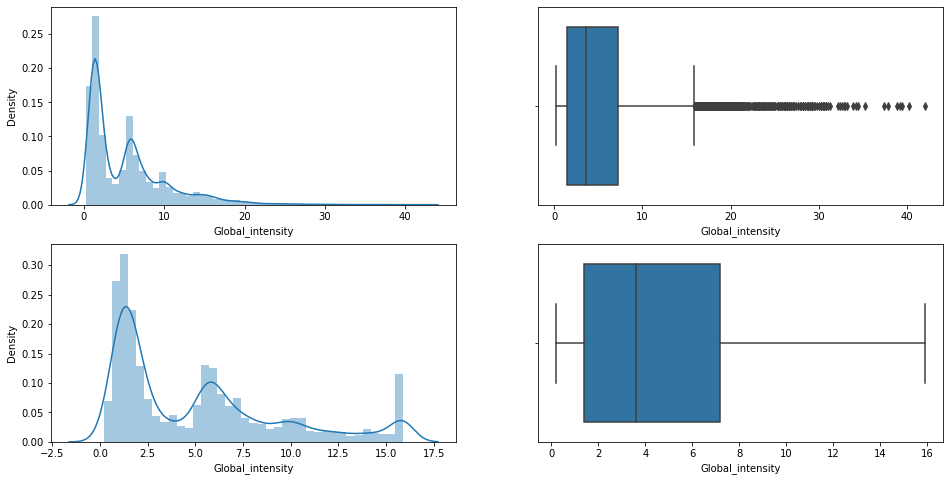

In [24]:
create_comparison_plot(df,df1,"Global_intensity")

**for fixed Sub_metering_1**

In [25]:
remove_outliers_IQR('Sub_metering_1')

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day


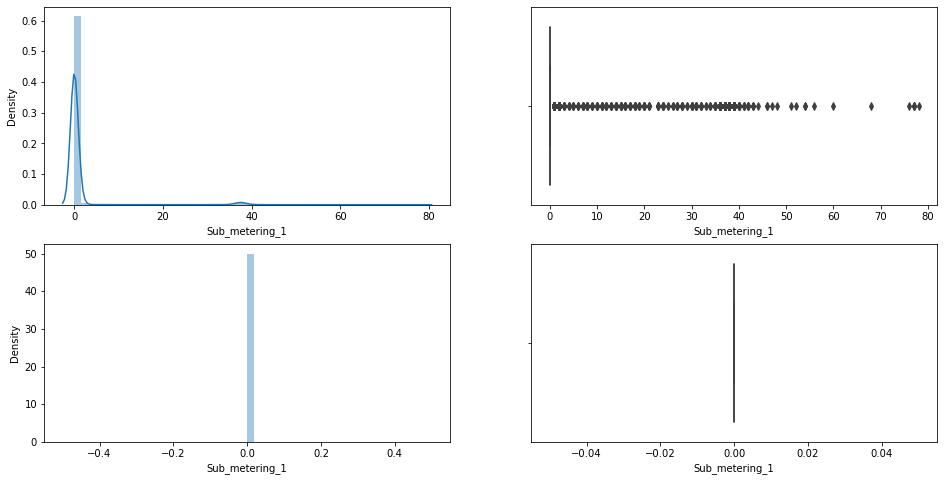

In [26]:
create_comparison_plot(df,df1,"Sub_metering_1")

**for fixed Sub_metering_2**

In [27]:
remove_outliers_IQR('Sub_metering_2')

percentile25 0.0
percentile75 1.0
Upper limit 2.5
Lower limit -1.5


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day


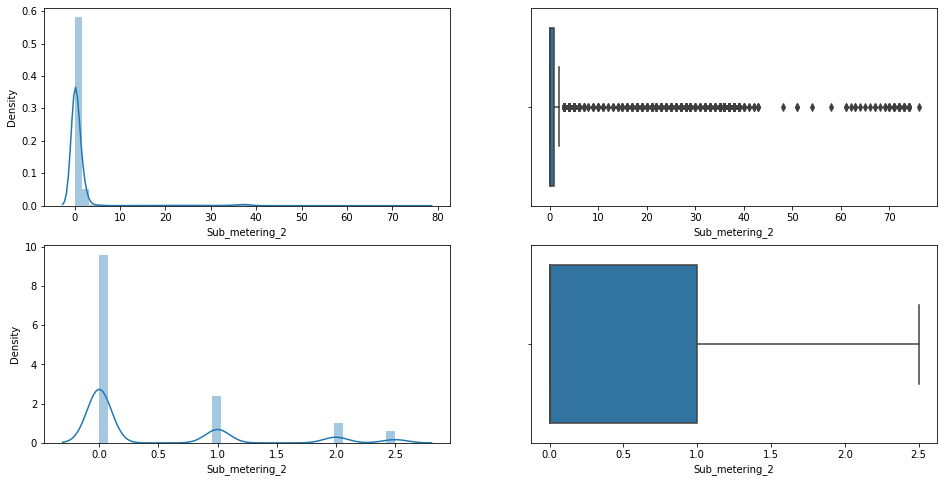

In [28]:
create_comparison_plot(df,df1,"Sub_metering_2")

**as Voltage is following normal distribution so for that we use Z score for handling oultliers**

In [29]:
def outlier_handler(col):
    var_mean=df1[col].mean()
    up_limit = var_mean +3*df1[col].std()
    low_limit = var_mean -3*df1[col].std()
    df1[col] = np.where(df1[col]>up_limit, up_limit, np.where(df1[col]<low_limit,low_limit,df1[col]))
    return df1[df1[col] > up_limit]

In [30]:
outlier_handler("Voltage")

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day


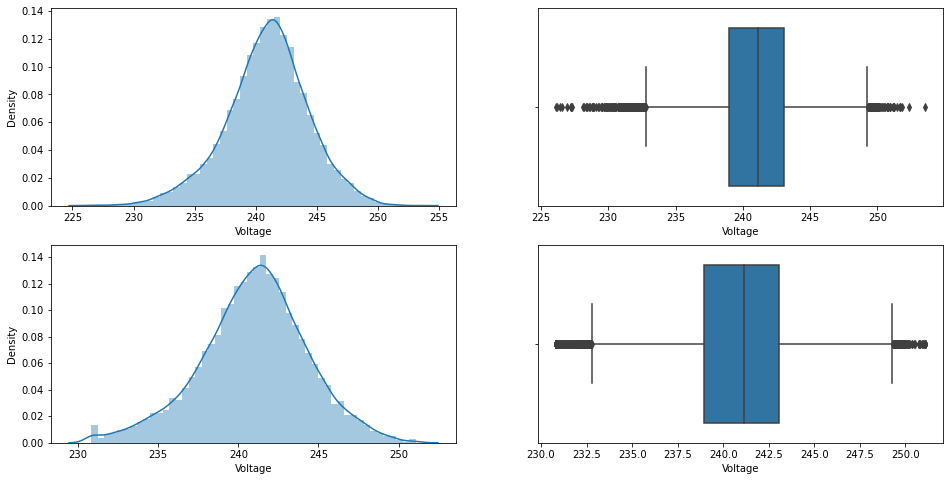

In [31]:
create_comparison_plot(df,df1,"Voltage")

# checking missing values

In [32]:
df1.isna().sum()

dt                         0
Global_active_power      213
Global_reactive_power    213
Voltage                  213
Global_intensity         213
Sub_metering_1           213
Sub_metering_2           213
Sub_metering_3           213
year                       0
month                      0
day                        0
dtype: int64

In [33]:
# we need to handel these values for that we have to split our data... which we do in later stage

## Multivariate Analysis

Multivariate analysis is the analysis of more than one variable

In [34]:
df[(list(df.columns)[1:])].corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day
Global_active_power,1.000000,0.225893,-0.435355,0.998858,0.447996,0.424880,0.591053,-0.199763,0.132658,0.107253
Global_reactive_power,0.225893,1.000000,-0.104865,0.242428,0.108892,0.130155,0.074414,0.013950,0.041409,0.030303
Voltage,-0.435355,-0.104865,1.000000,-0.444855,-0.203721,-0.176414,-0.303635,0.108257,0.016247,0.035438
Global_intensity,0.998858,0.242428,-0.444855,1.000000,0.452700,0.430224,0.579942,-0.202549,0.134176,0.106808
Sub_metering_1,0.447996,0.108892,-0.203721,0.452700,1.000000,0.070986,0.108872,-0.009202,-0.001426,0.005570
Sub_metering_2,0.424880,0.130155,-0.176414,0.430224,0.070986,1.000000,0.076797,-0.055247,0.019900,0.036692
Sub_metering_3,0.591053,0.074414,-0.303635,0.579942,0.108872,0.076797,1.000000,0.016659,0.002772,0.011735
year,-0.199763,0.013950,0.108257,-0.202549,-0.009202,-0.055247,0.016659,1.000000,-0.461793,-0.263996
month,0.132658,0.041409,0.016247,0.134176,-0.001426,0.019900,0.002772,-0.461793,1.000000,0.226825
day,0.107253,0.030303,0.035438,0.106808,0.005570,0.036692,0.011735,-0.263996,0.226825,1.000000


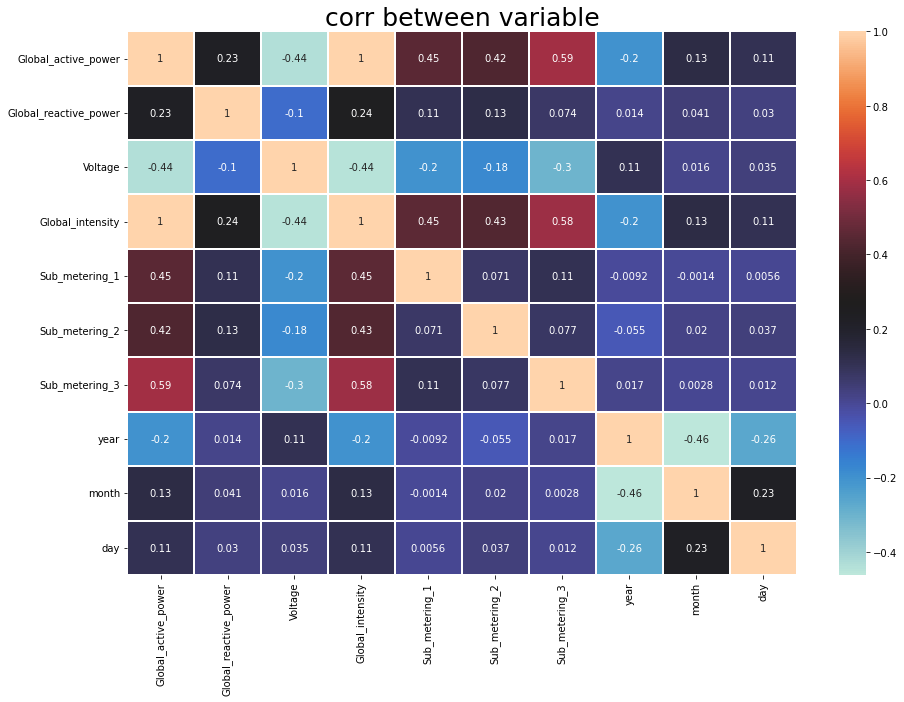

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=25)
plt.show()

**report**
- Gloabl_intensity and Gloabl_active_power are highly correlated


**what is Global active power and Global reactive power**

The active power is the real power consumes by the load. Whereas, the reactive power is the useless power. The active power is the product of the voltage, current and the cosine of the angle between them. Whereas, the reactive power is the product of voltage and current and the sine of the angle between them.

**Global_active_power vs year**

In [36]:
df1.groupby(df1.year)["Global_active_power"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2006,4000.0,1.798747,1.225167,0.194,0.488,1.676,2.6765,3.8475
2007,3977.0,1.077438,1.040991,0.098,0.270,0.508,1.5520,3.8475
2008,3997.0,1.025854,0.970645,0.078,0.290,0.524,1.4880,3.8475
2009,3958.0,1.073262,0.953786,0.126,0.318,0.622,1.5140,3.8475
2010,3855.0,1.048542,0.859464,0.140,0.340,0.728,1.5260,3.8475


<AxesSubplot:xlabel='year'>

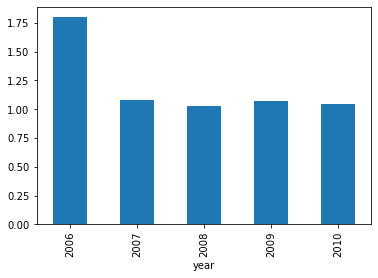

In [37]:
df1.groupby(df1.year)["Global_active_power"].mean().plot(kind="bar")

**Global_active_power vs month**

In [38]:
df1.groupby(df1.month)["Global_active_power"].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1299.0,1.437662,1.070427,0.208,0.406,1.392,1.9990,3.8475
2,1262.0,1.279859,1.054151,0.204,0.334,1.289,1.7455,3.8475
3,1379.0,1.180906,0.987522,0.202,0.352,0.880,1.6050,3.8475
4,1275.0,0.991005,0.876514,0.108,0.334,0.516,1.4680,3.8475
5,1369.0,1.025685,0.892975,0.110,0.336,0.584,1.5020,3.8475
6,1347.0,0.905982,0.849241,0.098,0.270,0.498,1.3700,3.8475
7,1455.0,0.701339,0.713497,0.098,0.236,0.350,1.0300,3.8475
8,1374.0,0.582104,0.726567,0.078,0.176,0.264,0.6925,3.8475
9,1341.0,0.954905,0.899379,0.104,0.264,0.480,1.4260,3.8475


<AxesSubplot:xlabel='month'>

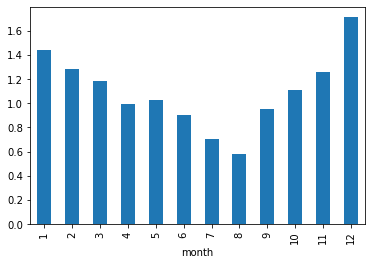

In [39]:
df1.groupby(df1.month)["Global_active_power"].mean().plot(kind="bar")

**Global_reactive_power vs year**

In [40]:
df1.groupby(df1.year)["Global_reactive_power"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2006,4000.0,0.130737,0.112095,0.0,0.046,0.118,0.196,0.413
2007,3977.0,0.113577,0.100562,0.0,0.000,0.098,0.178,0.413
2008,3997.0,0.114554,0.103270,0.0,0.046,0.094,0.178,0.413
2009,3958.0,0.129231,0.111075,0.0,0.050,0.106,0.208,0.413
2010,3855.0,0.128492,0.107201,0.0,0.056,0.102,0.200,0.413


<AxesSubplot:xlabel='year'>

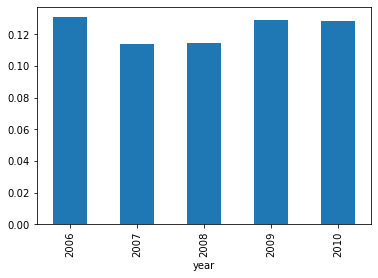

In [41]:
df1.groupby(df1.year)["Global_reactive_power"].mean().plot(kind="bar")

**Global_reactive_power vs month**

In [42]:
df1.groupby(df1.month)["Global_reactive_power"].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1299.0,0.112072,0.102696,0.0,0.0000,0.094,0.1760,0.413
2,1262.0,0.095367,0.092861,0.0,0.0000,0.078,0.1275,0.413
3,1379.0,0.107914,0.100042,0.0,0.0000,0.092,0.1680,0.413
4,1275.0,0.118791,0.103258,0.0,0.0460,0.100,0.1900,0.413
5,1369.0,0.122419,0.107814,0.0,0.0480,0.100,0.1940,0.413
6,1347.0,0.144306,0.108438,0.0,0.0740,0.118,0.2180,0.413
7,1455.0,0.147656,0.113078,0.0,0.0740,0.120,0.2220,0.413
8,1374.0,0.140389,0.112840,0.0,0.0115,0.126,0.2240,0.413
9,1341.0,0.131549,0.109214,0.0,0.0560,0.106,0.2060,0.413


<AxesSubplot:xlabel='month'>

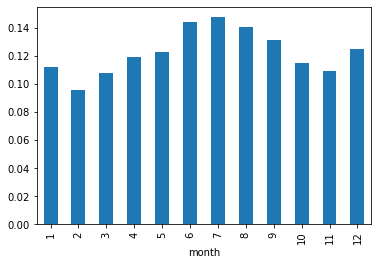

In [43]:
df1.groupby(df1.month)["Global_reactive_power"].mean().plot(kind="bar")

# droping the date feature

In [44]:
df1=df1.drop("dt",axis=1)

### ***data segregation***

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index,test_index in split.split(df1,df1["year"]):
    strat_train_set=df1.loc[train_index]
    strat_test_set=df1.loc[test_index]

**handling missing values**

In [46]:
df1.isna().sum()

Global_active_power      213
Global_reactive_power    213
Voltage                  213
Global_intensity         213
Sub_metering_1           213
Sub_metering_2           213
Sub_metering_3           213
year                       0
month                      0
day                        0
dtype: int64

In [47]:
null_features=df.columns[df.isna().any()].tolist()

In [48]:
# imputing the null values with the median

In [49]:
def impute_nan(d,variable,median):
    d[variable]=d[variable].fillna(median)

In [50]:
for col in null_features:
    median=strat_train_set[col].median()
    impute_nan(strat_train_set,col,median)
    impute_nan(strat_test_set,col,median)
    

In [51]:
strat_test_set.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
day                      0
dtype: int64

In [52]:
strat_train_set.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
day                      0
dtype: int64

# now generating the target variable

**Data Set Information**

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


In [53]:
# Creating Target Variable for strat_train_set
eq1 = (strat_train_set['Global_active_power']*1000/60) 
eq2 = strat_train_set['Sub_metering_1'] + strat_train_set['Sub_metering_2'] + strat_train_set['Sub_metering_3']
strat_train_set['power_consumption'] = eq1 - eq2
strat_train_set.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,power_consumption
908,0.178,0.000,241.91,0.8,0.0,0.0,0.0,2008,9,7,2.966667
11927,1.974,0.188,241.35,8.2,0.0,0.0,30.0,2008,5,10,2.900000
17979,0.234,0.106,240.93,1.0,0.0,1.0,1.0,2010,8,12,1.900000
16039,0.508,0.136,240.38,2.4,0.0,0.0,1.0,2008,7,29,7.466667
12002,2.218,0.184,240.56,10.6,0.0,0.0,0.0,2009,12,11,36.966667


In [54]:
# Creating Target Variable for strat_test_set
eq1 = (strat_test_set['Global_active_power']*1000/60) 
eq2 = strat_test_set['Sub_metering_1'] + strat_test_set['Sub_metering_2'] + strat_test_set['Sub_metering_3']
strat_test_set['power_consumption'] = eq1 - eq2
strat_test_set.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,power_consumption
18354,0.234,0.114,242.59,1.0,0.0,2.0,0.0,2010,8,3,1.900000
12952,1.860,0.118,238.66,8.4,0.0,1.0,18.0,2006,12,24,12.000000
8818,0.284,0.204,233.14,1.4,0.0,1.0,0.0,2007,7,19,3.733333
6431,0.408,0.232,240.92,1.8,0.0,1.0,1.0,2009,6,21,4.800000
9305,1.524,0.190,238.92,6.4,0.0,1.0,18.0,2007,9,26,6.400000


In [55]:
strat_train_set.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'year', 'month', 'day', 'power_consumption'],
      dtype='object')

if we are creating target feature from independent features then we have to drop those independent features from x_train or not (doubt)

In [56]:
strat_train_set=strat_train_set.drop(columns=["Sub_metering_1","Sub_metering_2","Sub_metering_3","Global_active_power"],axis=1)
strat_test_set = strat_test_set.drop(columns=["Sub_metering_1","Sub_metering_2","Sub_metering_3","Global_active_power"],axis=1)

### Checking Statistical summary of power consumption yearly

In [57]:
strat_train_set.groupby(strat_train_set.year)["power_consumption"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2006,2800.0,22.338307,17.154990,2.266667,5.758333,17.783333,39.233333,64.125
2007,2800.0,11.778783,13.285335,-0.033333,3.766667,5.500000,13.183333,64.125
2008,2800.0,10.774878,12.270664,-0.300000,3.700000,5.666667,11.091667,64.125
2009,2800.0,10.786071,11.822729,0.300000,3.933333,5.700000,12.541667,64.125
2010,2800.0,9.741205,9.654439,0.733333,4.066667,5.800000,12.100000,63.125


In [58]:
# Checking Statistical summary of power consumption monthly

strat_train_set.groupby(strat_train_set.month)["power_consumption"].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,910.0,15.260201,13.660970,1.966667,5.433333,8.333333,22.058333,64.125000
2,896.0,13.236105,13.324793,2.233333,4.633333,6.366667,16.416667,63.666667
3,987.0,12.661322,12.653089,1.966667,4.866667,6.766667,14.016667,64.125000
4,906.0,9.968902,10.456922,1.400000,4.466667,5.766667,10.200000,63.125000
5,956.0,9.906145,11.018063,0.800000,4.166667,5.766667,9.841667,64.125000
6,964.0,8.266632,9.988218,0.600000,3.300000,4.700000,8.308333,63.125000
7,1005.0,6.889469,8.452687,0.433333,2.800000,4.066667,7.000000,64.000000
8,999.0,5.825467,8.275297,-0.300000,2.066667,3.333333,4.900000,61.625000
9,993.0,9.749538,11.435886,0.300000,3.233333,4.933333,11.366667,64.125000


**Can power consumed be negative?**

 If users have Current transformer leads or the actual CT installed in the reverse direction, this will cause both power and power factor readings to read negative.

## spliting the data

In [59]:
x_train=strat_train_set.drop("power_consumption",axis=1)
y_train=strat_train_set["power_consumption"]
x_test=strat_test_set.drop("power_consumption",axis=1)
y_test=strat_test_set["power_consumption"]

## Feature selection

**Drop Constant Features Using Variance Threshold**

In [60]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [61]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True])

In [62]:
sum(var_thres.get_support())

6

In [63]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [64]:
for column in constant_columns:
    print(column)

In [65]:
# we are not droping this feature right now  , as we have to do for further analysis

**pearson correlation**

In [66]:
# if two  features are highly correlated ( not w.r.t target i m saying ) .then we can drop one of the feature as it is doing the same thing , for that we specify some threshold value

In [67]:
# taking a threshold value --> given by domain expert
# the time being we are taking threshold =0.95

In [68]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [69]:
# giving threshold 60 percent for the time 
threshold=0.95

In [70]:
correlation(x_train.iloc[:,:-1],threshold)

set()

In [71]:
x_train=x_train.drop("Global_intensity",axis=1)
x_test=x_test.drop("Global_intensity",axis=1)

**information gain**

In [72]:
# from sklearn.feature_selection import mutual_info_classif # for classification
from sklearn.feature_selection import mutual_info_regression # for regression problem

In [73]:
mutual_info=mutual_info_regression(x_train,y_train)

In [74]:
mutual_data=pd.Series(mutual_info,index=x_train.columns)

In [75]:
mutual_data.sort_values(ascending=False)

month                    0.180629
Global_reactive_power    0.159321
Voltage                  0.150361
year                     0.100194
day                      0.072255
dtype: float64

In [76]:
# we do feature  selection w.r.t our training data only then remove from train and test.. to avoid overfitting

## independent feature vs dependent feature

- Plot data and a linear regression model fit.

In [77]:
continues_features=[feature for feature in x_train.columns if len(x_train[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Global_reactive_power', 'Voltage', 'month', 'day']


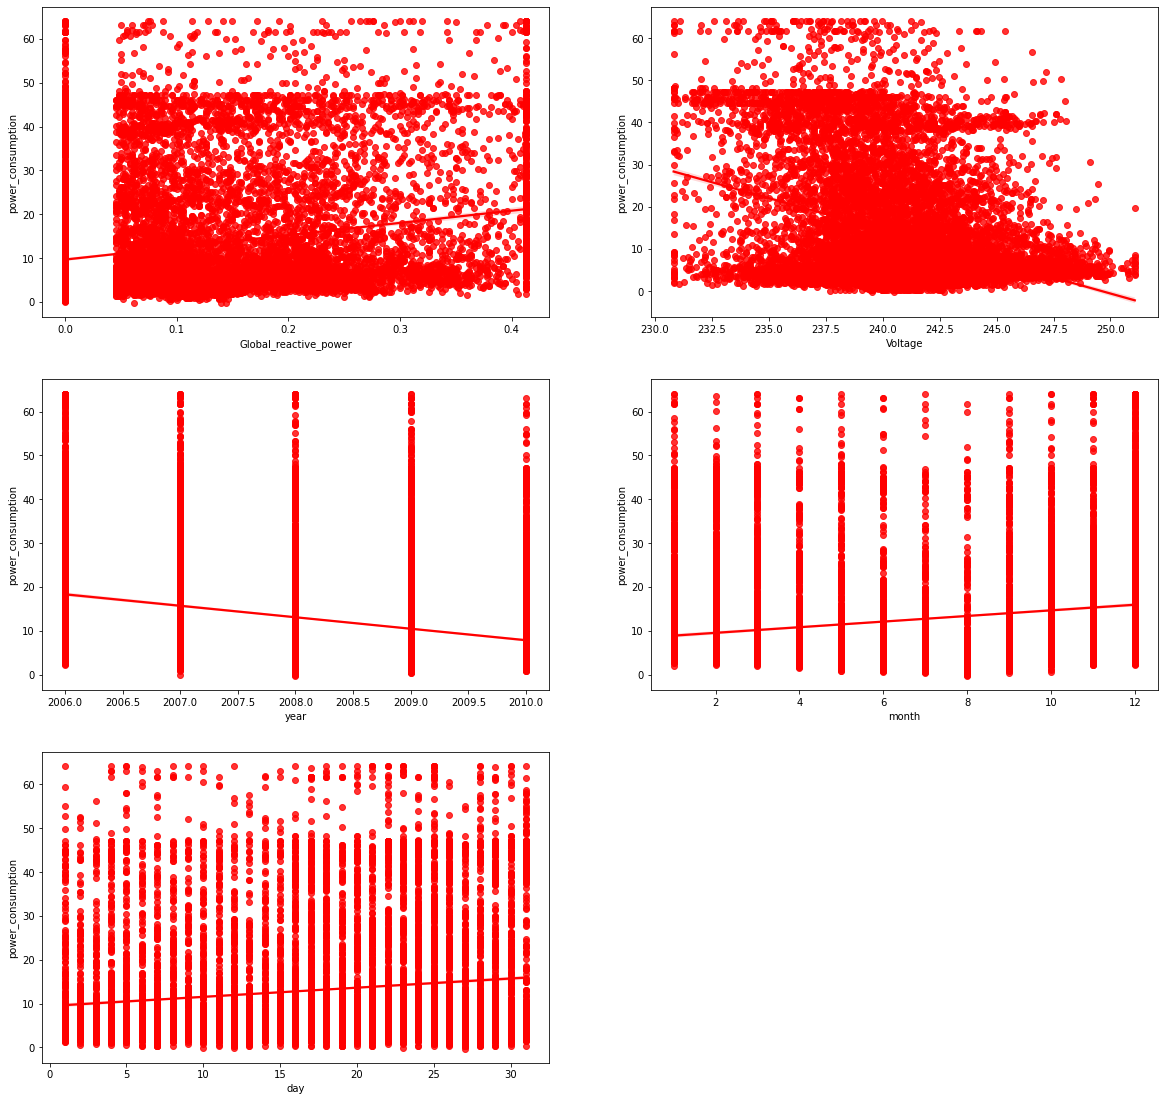

In [78]:
count=1
plt.subplots(figsize=(20, 40))
for col in x_train.columns:
    plt.subplot(6,2,count)
    sns.regplot(data=x_train,x=col,y=y_train,color="red")
    count+=1

plt.show()

In [79]:
# no feature is showing linear behaviour ,

## saving the data in mogodb

In [81]:
x_train.head()

,Global_reactive_power,Voltage,year,month,day
908,0.000,241.91,2008,9,7
11927,0.188,241.35,2008,5,10
17979,0.106,240.93,2010,8,12
16039,0.136,240.38,2008,7,29
12002,0.184,240.56,2009,12,11


In [85]:
pd.DataFrame(y_train).head()

,power_consumption
908,2.966667
11927,2.900000
17979,1.900000
16039,7.466667
12002,36.966667


#since index are same we directly concat them

In [90]:
training_data=pd.concat([x_train,pd.DataFrame(y_train,columns=["power_consumption"])],axis=1)

In [93]:
training_data.head()

,Global_reactive_power,Voltage,year,month,day,power_consumption
908,0.000,241.91,2008,9,7,2.966667
11927,0.188,241.35,2008,5,10,2.900000
17979,0.106,240.93,2010,8,12,1.900000
16039,0.136,240.38,2008,7,29,7.466667
12002,0.184,240.56,2009,12,11,36.966667


In [94]:
x_test.head()

,Global_reactive_power,Voltage,year,month,day
18354,0.114,242.59,2010,8,3
12952,0.118,238.66,2006,12,24
8818,0.204,233.14,2007,7,19
6431,0.232,240.92,2009,6,21
9305,0.190,238.92,2007,9,26


In [96]:
y_test.head()

18354     1.900000
12952    12.000000
8818      3.733333
6431      4.800000
9305      6.400000
Name: power_consumption, dtype: float64

In [97]:
testing_data=pd.concat([x_test,pd.DataFrame(y_test,columns=["power_consumption"])],axis=1)`

In [98]:
testing_data.head(5)

,Global_reactive_power,Voltage,year,month,day,power_consumption
18354,0.114,242.59,2010,8,3,1.900000
12952,0.118,238.66,2006,12,24,12.000000
8818,0.204,233.14,2007,7,19,3.733333
6431,0.232,240.92,2009,6,21,4.800000
9305,0.190,238.92,2007,9,26,6.400000


In [105]:
import pymongo
client = pymongo.MongoClient("mongodb+srv://Prikshit7766:<password>@cluster0.bb7u7jb.mongodb.net/?retryWrites=true&w=majority")
db = client.test
database=client["electric_power_consumption"]

In [106]:
#converting datafrae to dict
data_training=training_data.to_dict('records')

In [107]:
data_testing=testing_data.to_dict('records')

In [108]:
collection_training= database["data_training"]
collection_testing= database["data_testing"]

In [109]:
collection_training.insert_many(data_training)
collection_testing.insert_many(data_testing)